# Data exploration and split

In [1]:
!pip install geopandas rtree # install necessary packages

import geopandas as gpd
import pandas as pd
import rtree
import os
import pickle

print(os.getcwd())

# To mount the raw data and save it using pickle:
# data = gpd.read_file('/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/ookla-canada-speed-tiles.shp')
# with open('/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/canada-speed-data.p', 'wb') as file:
#    pickle.dump(data, file)

# To load the data 
with open('/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/canada-speed-data.p', 'rb') as file: 
    data = pickle.load(file) 
data.head(5)

     |████████████████████████████████| 1.0 MB 3.6 MB/s 
     |████████████████████████████████| 994 kB 24.1 MB/s 
     |████████████████████████████████| 16.7 MB 255 kB/s 
     |████████████████████████████████| 6.3 MB 35.8 MB/s 
/content


,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,quarter,conn_type,PRUID,...,CDUID,CDNAME,DAUID,SACTYPE,DA_POP,PCUID,PCNAME,PCTYPE,PCCLASS,geometry
0,0023331133131332,11910,1408,27,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4593360.869 4089469.904, 4593533.055..."
1,0023331133133011,14969,1554,25,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4592705.709 4089714.238, 4592877.874..."
2,0032202103303220,5038,1317,54,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010054,8,330.0,None,None,None,None,"POLYGON ((4736491.486 4146142.702, 4736658.777..."
3,0032220031120102,13419,6169,50,4,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,None,None,None,None,"POLYGON ((4642710.684 4070147.116, 4642884.538..."
4,0032220031120103,13587,1095,28,2,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,0388,Inuvik,4,2,"POLYGON ((4642884.538 4070012.633, 4643058.404..."


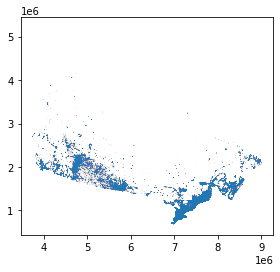

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot()

In [ ]:
# check data shape
print("data shape:{shape}".format(shape=data.shape),"\n", "data columns:{columns}".format(columns=list(data)))

data shape:(2751464, 21) 
 data columns:['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices', 'year', 'quarter', 'conn_type', 'PRUID', 'PRNAME', 'CDUID', 'CDNAME', 'DAUID', 'SACTYPE', 'DA_POP', 'PCUID', 'PCNAME', 'PCTYPE', 'PCCLASS', 'geometry']


In [ ]:
# Task: split the data by PRNAME, save them separately.

# 1. Get the list of unique PRNAMES
provinces = data['PRNAME'].unique().tolist()
print(provinces)

# 2. Select * from data where PRNAME=='Yukon' ## example case
print(data[data['PRNAME']=='Yukon'].shape)


['Northwest Territories / Territoires du Nord-Ouest', 'Yukon', 'British Columbia / Colombie-Britannique', 'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 'Newfoundland and Labrador / Terre-Neuve-et-Labrador', 'Quebec / Québec', 'New Brunswick / Nouveau-Brunswick', 'Nova Scotia / Nouvelle-Écosse', 'Prince Edward Island / Île-du-Prince-Édouard', 'Nunavut']
(2696, 21)


In [ ]:
# 3. Select * from data where PRNAME == each provice, then save the output as .shp file in each folder named after the province

# province_names = ['Northwest Territories', 'Yukon', 'British Columbia', 
#                   'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 
#                   'Newfoundland and Labrador', 'Quebec', 'New Brunswick', 
#                   'Nova Scotia', 'Prince Edward Island', 'Nunavut']

# for i, p in enumerate(provinces):
    
#     # extract data
#     print("Extracting: {p_name}".format(p_name = p))
#     temp_d = data[data['PRNAME']==p]
    
#     # create province directory
#     province_n = province_names[i]
#     province_dir = '/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/' + province_n + '/'
#     if os.path.exists(province_dir):
#         os.rmdir(province_dir)    
#     os.mkdir(province_dir)
    
#     # set output file path
#     out_file_path = province_dir + province_n + '-speed-tiles.shp'

#     # write .shp file
#     temp_d.to_file(out_file_path)

In [ ]:
os.mkdir('')

In [30]:
## split the data more: by year and quarter

import shutil

os.chdir('/content/drive/MyDrive/shared/2022-ssc-case-comp/')
os.getcwd()

provinces = data['PRNAME'].unique().tolist() # different from 'province_names' below'

province_names = ['Northwest Territories', 'Yukon', 'British Columbia', 
                  'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 
                  'Newfoundland and Labrador', 'Quebec', 'New Brunswick', 
                  'Nova Scotia', 'Prince Edward Island', 'Nunavut']

years = data['year'].unique()
quarters = data['quarter'].unique()

for i, p in enumerate(provinces):
    
    # locate province directory
    province_n = province_names[i]
    province_dir = '/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/' + province_n + '/'
    year_dir = '/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/' + province_n + '/by_year_quarter/'
    
    # create year and quarter directories
    if os.path.exists(year_dir):
        shutil.rmtree(year_dir, ignore_errors=True)
    os.mkdir(year_dir)

    for year in years:
        
        for quarter in quarters:

            # extract data
            print("Extracting: {p_name}-{year}-{quarter}".format(p_name = province_names[i], year=year, quarter=quarter))
            cond = (data['PRNAME']==p) & (data['year'] == year) & (data['quarter'] ==quarter)
            temp_d = data[cond]
            
            # set output file path
            out_file_shp = year_dir + province_n + '-' + str(year) + '-' + quarter + '.shp'
            out_file_csv = year_dir + province_n + '-' + str(year) + '-' + quarter + '.csv'

            try:
                temp_d.to_file(out_file_shp)  # write .shp file
                temp_d.to_csv(out_file_csv,index=False, mode='w') # write .csv file
            except ValueError:
                pass         

print('done!')

Extracting: Northwest Territories-2019-Q1
Extracting: Northwest Territories-2019-Q2
Extracting: Northwest Territories-2019-Q3
Extracting: Northwest Territories-2019-Q4
Extracting: Northwest Territories-2020-Q1
Extracting: Northwest Territories-2020-Q2
Extracting: Northwest Territories-2020-Q3
Extracting: Northwest Territories-2020-Q4
Extracting: Northwest Territories-2021-Q1
Extracting: Northwest Territories-2021-Q2
Extracting: Northwest Territories-2021-Q3
Extracting: Northwest Territories-2021-Q4
Extracting: Yukon-2019-Q1
Extracting: Yukon-2019-Q2
Extracting: Yukon-2019-Q3
Extracting: Yukon-2019-Q4
Extracting: Yukon-2020-Q1
Extracting: Yukon-2020-Q2
Extracting: Yukon-2020-Q3
Extracting: Yukon-2020-Q4
Extracting: Yukon-2021-Q1
Extracting: Yukon-2021-Q2
Extracting: Yukon-2021-Q3
Extracting: Yukon-2021-Q4
Extracting: British Columbia-2019-Q1
Extracting: British Columbia-2019-Q2
Extracting: British Columbia-2019-Q3
Extracting: British Columbia-2019-Q4
Extracting: British Columbia-2020-Q1